<a href="https://colab.research.google.com/github/Selami7321/python-veri-i-leme-dev-2/blob/main/BYM304_ODEV3_CNN_GRUP18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [33]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dogs vs Cats Image Classification Without Image Augmentation

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this tutorial, we will discuss how to classify images into pictures of cats or pictures of dogs. We'll build an image classifier using `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`.

## Specific concepts that will be covered:
In the process, we will build practical experience and develop intuition around the following concepts

* Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class — How can we efficiently work with data on disk to interface with our model?
* _Overfitting_ - what is it, how to identify it?

<hr>


**Before you begin**

Before running the code in this notebook, reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. If you have been working through several notebooks, this will help you avoid reaching Colab's memory limits.


# Importing packages

Let's start by importing required packages:

*   os — to read files and directory structure
*   numpy — for some matrix math outside of TensorFlow
*   matplotlib.pyplot — to plot the graph and display images in our training and validation data


In [34]:
import tensorflow as tf

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [37]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

To build our image classifier, we begin by downloading the dataset. The dataset we are using is a filtered version of <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> dataset from Kaggle (ultimately, this dataset is provided by Microsoft Research).

In previous Colabs, we've used <a href="https://www.tensorflow.org/datasets" target="_blank">TensorFlow Datasets</a>, which is a very easy and convenient way to use datasets. In this Colab however, we will make use of the class `tf.keras.preprocessing.image.ImageDataGenerator` which will read data from disk. We therefore need to directly download *Dogs vs. Cats* from a URL and unzip it to the Colab filesystem.

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
import os

train_dir = '/kaggle/working/train'

# Dizinin var olup olmadığını kontrol et
if os.path.exists(train_dir):
    print(f"Directory {train_dir} exists.")
else:
    print(f"Directory {train_dir} does not exist.")


Directory /kaggle/working/train does not exist.


In [40]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We can list the directories with the following terminal command:

In [41]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered_extracted
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filterted_extracted
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/va

We'll now assign variables with the proper file path for the training and validation sets.

In [42]:
train_dir = '/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train'
validation_dir = '/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation'

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [43]:
print("Cats in Training:", len(os.listdir(train_cats_dir)))
print("Dogs in Training:", len(os.listdir(train_dogs_dir)))
print("Cats in Validation:", len(os.listdir(validation_cats_dir)))
print("Dogs in Validation:", len(os.listdir(validation_dogs_dir)))


Cats in Training: 1000
Dogs in Training: 1000
Cats in Validation: 500
Dogs in Validation: 500


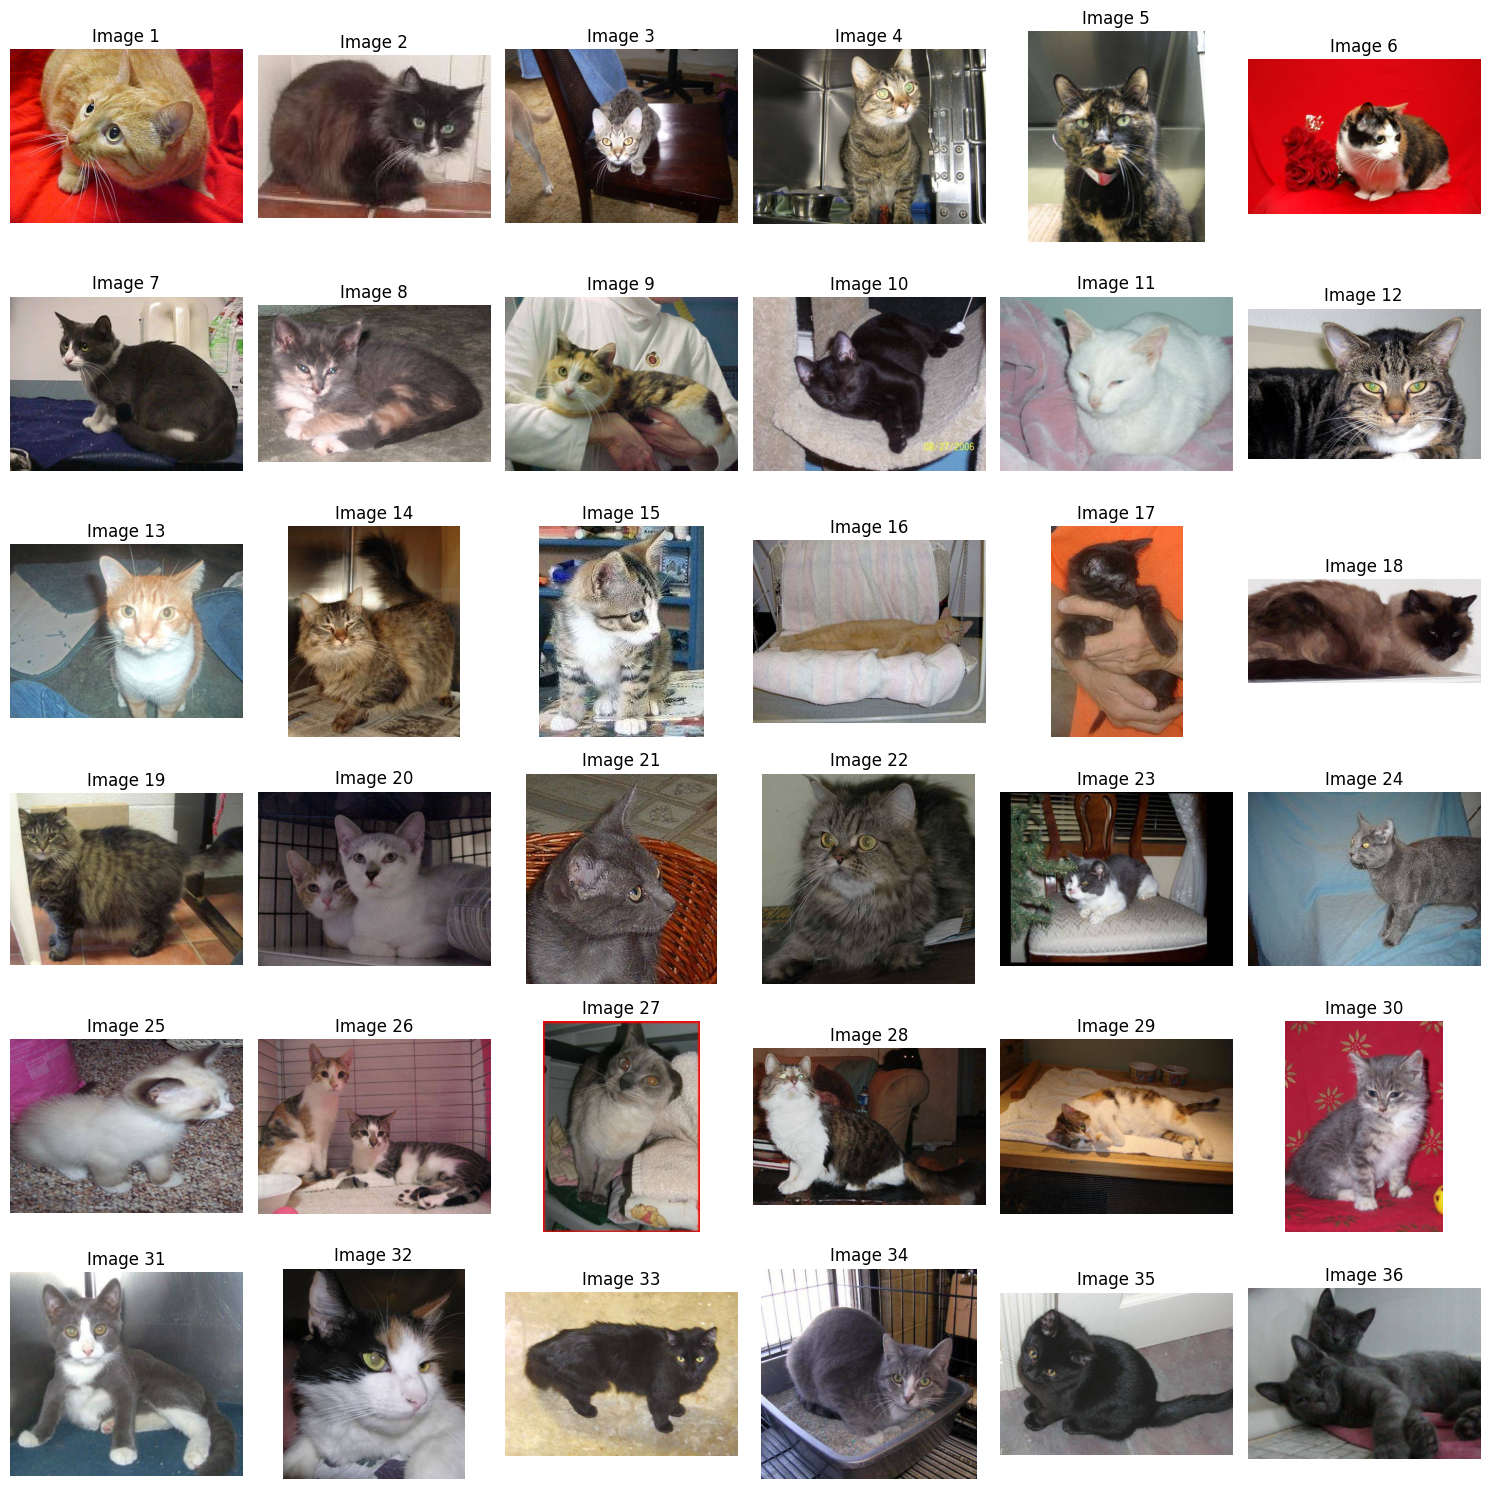

In [44]:
import matplotlib.pyplot as plt
from PIL import Image

# Training cats directory içindeki resimleri görselleştir
image_list = os.listdir(train_cats_dir)

plt.figure(figsize=(15, 15))
for i in range(min(36, len(image_list))):  # En fazla 36 resim gösterecek
    plt.subplot(6, 6, i + 1)
    img = Image.open(os.path.join(train_cats_dir, image_list[i]))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()


In [45]:
import tensorflow as tf

# Kedi ve köpek veri setini indir
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', dataset_url, untar=True)

print("Veri seti başarıyla indirildi ve açıldı:", dataset_path)


Veri seti başarıyla indirildi ve açıldı: /root/.keras/datasets/cats_and_dogs_filtered_extracted


<ipython-input-45-b24bb836d3ec>:5: UserWarning: Could not extract archive.
  dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', dataset_url, untar=True)


In [46]:
import zipfile
import os

# Veri setinin bulunduğu yol
dataset_zip_path = '/root/.keras/datasets/cats_and_dogs_filtered.zip'
dataset_extract_path = '/root/.keras/datasets/cats_and_dogs_filtered_extracted/'

# Arşivi çıkartalım
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_extract_path)

print("Veri seti çıkarıldı.")


Veri seti çıkarıldı.


In [47]:
# Çıkartılan dizindeki dosya yapısını kontrol et
for root, dirs, files in os.walk(dataset_extract_path):
    print(f"Root: {root}")
    for dir in dirs:
        print(f"Dir: {dir}")
    for file in files:
        print(f"File: {file}")


Root: /root/.keras/datasets/cats_and_dogs_filtered_extracted/
Dir: cats_and_dogs_filtered
Root: /root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
Dir: validation
Dir: train
File: vectorize.py
Root: /root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation
Dir: dogs
Dir: cats
Root: /root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/dogs
File: dog.2241.jpg
File: dog.2172.jpg
File: dog.2006.jpg
File: dog.2056.jpg
File: dog.2167.jpg
File: dog.2435.jpg
File: dog.2035.jpg
File: dog.2104.jpg
File: dog.2458.jpg
File: dog.2442.jpg
File: dog.2097.jpg
File: dog.2324.jpg
File: dog.2268.jpg
File: dog.2015.jpg
File: dog.2277.jpg
File: dog.2231.jpg
File: dog.2280.jpg
File: dog.2407.jpg
File: dog.2419.jpg
File: dog.2213.jpg
File: dog.2318.jpg
File: dog.2380.jpg
File: dog.2153.jpg
File: dog.2219.jpg
File: dog.2168.jpg
File: dog.2321.jpg
File: dog.2461.jpg
File: dog.2402.jpg
File: dog.2365.jpg
File: dog.2450

In [48]:
train_cats_dir = os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'train', 'cats')
train_dogs_dir = os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'train', 'dogs')
validation_cats_dir = os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'validation', 'cats')
validation_dogs_dir = os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'validation', 'dogs')

# Dizinin mevcut olduğunu kontrol edelim
print("Kedi dizini mevcut mu?", os.path.exists(train_cats_dir))
print("Köpek dizini mevcut mu?", os.path.exists(train_dogs_dir))
print("Validation kedi dizini mevcut mu?", os.path.exists(validation_cats_dir))
print("Validation köpek dizini mevcut mu?", os.path.exists(validation_dogs_dir))


Kedi dizini mevcut mu? True
Köpek dizini mevcut mu? True
Validation kedi dizini mevcut mu? True
Validation köpek dizini mevcut mu? True


1. Veri Ön İşleme
Veri setini, her resmin boyutunu (150x150 piksel) ve değerlerini [0,1] aralığına normalize ederek hazırlayacağız.

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Verinin normalize edilmesi (Rescale)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim ve doğrulama verilerini hazırlıyoruz
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'train'),
    target_size=(150, 150),  # Görüntü boyutunu belirliyoruz
    batch_size=32,  # Bir seferde kaç resim yükleyeceğimizi belirliyoruz
    class_mode='binary'  # Kedi ve köpek için binary sınıflandırma
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_extract_path, 'cats_and_dogs_filtered', 'validation'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2. CNN Modelini Oluşturma
Veri setimizi hazırladıktan sonra, bir CNN modelini oluşturabiliriz.

In [50]:
from tensorflow.keras import layers, models

# CNN modelini oluşturuyoruz
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification için sigmoid aktivasyonu
])

# Modeli derliyoruz
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modelin özetini görüntülüyoruz
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

3. Modeli Eğitme
Veri setimiz hazır ve model oluşturulduktan sonra, modelimizi eğitmeye başlayabiliriz.

In [51]:
# Modeli eğitiyoruz
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 32 batch ile eğitim yapılacak adım sayısı
    epochs=10,  # Modelin kaç defa eğitim verisi üzerinden geçeceğini belirliyoruz
    validation_data=validation_generator,
    validation_steps=50  # 32 batch ile doğrulama yapılacak adım sayısı
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 62/100 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5413 - loss: 0.8434

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.5456 - loss: 0.8005 - val_accuracy: 0.5450 - val_loss: 0.6848
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6080 - loss: 0.6514 - val_accuracy: 0.6800 - val_loss: 0.6142
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7231 - loss: 0.5655 - val_accuracy: 0.6790 - val_loss: 0.5897
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7651 - loss: 0.4943 - val_accuracy: 0.7080 - val_loss: 0.5903
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7936 - loss: 0.4380 - val_accuracy: 0.6650 - val_loss: 0.6944
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8443 - loss: 0.3529 - val_accuracy: 0.7200 - val_loss: 0.6182
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.8924 - loss: 0.2543 - val_accuracy: 0.7440 - val_loss: 0.6842
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9407 - loss: 0.1633 - val_accuracy: 0.7

4. Model Performansını Görselleştirme
Modelin eğitim ve doğrulama doğruluğunu görselleştirerek performansını değerlendirebiliriz.

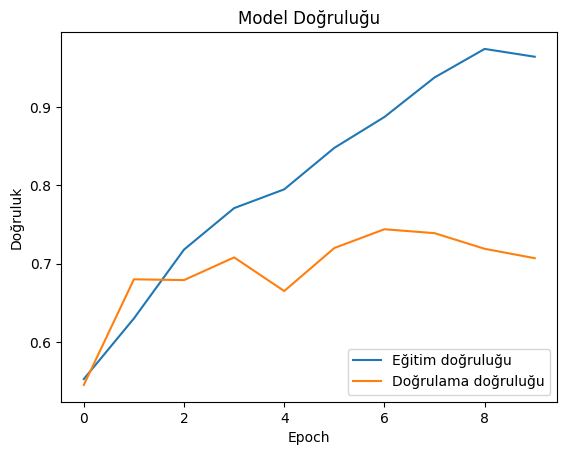

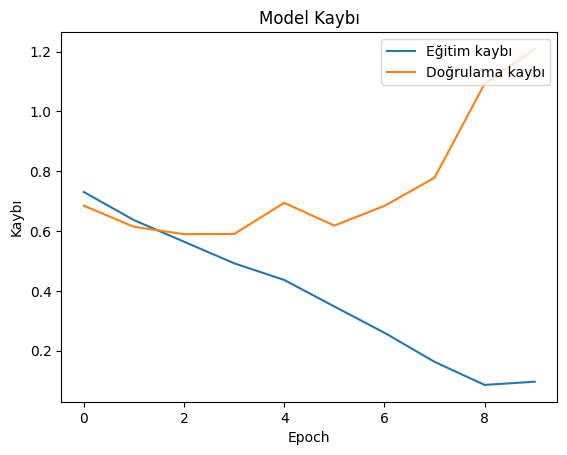

In [52]:
# Eğitim ve doğrulama doğruluğu grafiğini çiziyoruz
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend(loc='lower right')
plt.show()

# Eğitim ve doğrulama kaybı grafiğini çiziyoruz
plt.plot(history.history['loss'], label='Eğitim kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()


In [53]:
california_housing_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
california_housing_test = pd.read_csv('/content/sample_data/california_housing_test.csv')


In [54]:
import os
print(os.listdir('/content/sample_data'))


['anscombe.json', 'README.md', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_test.csv', 'mnist_train_small.csv']


In [55]:
import pandas as pd

# Verileri yükle
california_housing_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
california_housing_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')
mnist_train_small = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Yüklenen verilerin ilk 5 satırını görmek için
print(california_housing_train.head())
print(california_housing_test.head())
print(mnist_test.head())
print(mnist_train_small.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.2

In [56]:
# Veriyi yükleme
import pandas as pd

california_housing_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
california_housing_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Bağımsız değişkenler ve hedef değişken
X_train = california_housing_train.drop('median_house_value', axis=1)
y_train = california_housing_train['median_house_value']

X_test = california_housing_test.drop('median_house_value', axis=1)
y_test = california_housing_test['median_house_value']

# Modeli oluşturma (örneğin, LinearRegression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modeli eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')


Mean Squared Error: 4867205486.9289255
R²: 0.6195057678311953


In [58]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Veriyi yükleme
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

# Veriyi eğitim ve test setlerine ayırma
X_train = mnist_train.drop('6', axis=1)  # Etiket sütununu çıkar
y_train = mnist_train['6']

X_test = mnist_test.drop('7', axis=1)
y_test = mnist_test['7']

# Eğitim ve test setlerindeki ortak sütunları bulma
common_columns = X_train.columns.intersection(X_test.columns)

# Sadece ortak sütunları kullanma
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# Veriyi normalize etme (0-255 arası değerleri 0-1 arasına dönüştürme)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Modeli oluşturma (örneğin, bir MLP sınıflandırıcı)
model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=10, random_state=42)
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)

print(f'Doğruluk: {accuracy}')


Doğruluk: 0.0887088708870887


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


1. Eğitim Süresi (Max Iterations)
Modeliniz, maksimum iterasyon sayısına ulaşmış ve hâlâ konverjansa ulaşmamış. Bu, modelin eğitim süresi yetersiz olduğu anlamına gelir.

Çözüm: max_iter parametresini artırarak modeli daha fazla eğitim yapmaya zorlayabiliriz. Örneğin:

In [59]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)


2. Özelliklerin Normalizasyonu
Verilerin normalize edilmesi önemli, ancak bazı durumlarda farklı türde veriler daha hassas parametre ayarları gerektirir.

Çözüm: Verileri daha iyi ölçeklendirmek için standartlaştırma yapmayı deneyebiliriz (örneğin, StandardScaler kullanarak):

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


3. Modelin Karmaşıklığı


---


MLPClassifier'ın katman yapısı ve gizli nöron sayısı, modelin karmaşıklığını etkiler. Bu yapı çok basit olabilir.

Çözüm: Modelin katman sayısını ve gizli katmanlardaki nöron sayısını artırarak modelin kapasitesini artırabiliriz.
Örneğin:

In [61]:
model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=500, random_state=42)


4. Veri ile İlgili Problemler
Modelimiz çok düşük doğruluk veriyorsa, veride eksiklikler veya dengesizlikler olabilir. Bu, etiketlerin doğru temsil edilmediği anlamına gelebilir.

Çözüm: Eğitim verisi ve etiketlerin doğruluğunu kontrol edebiliriz. Ayrıca, veri setinde sınıf dengesizliği olup olmadığını kontrol etmek de faydalı olabilir. Gerekiyorsa, sınıf dengesini iyileştirmek için örnekleme teknikleri (over-sampling, under-sampling vb.) kullanabiliriz.

5. Veri Miktarı ve Kalitesi
Daha fazla eğitim verisi kullanmak veya verinin kalitesini artırmak, modelin başarısını artırabilir. Eğitim veri setimizin boyutu küçükse, modelin genel özellikleri öğrenmesi zor olabilir.

Özetle:
max_iter değerini artırırız.

Verileri standartlaştırırız.

Modelin yapısını (katmanlar ve nöron sayısı) büyütürüz.

Veri setini ve etiketlerin doğruluğunu kontrol ederiz.

Bu değişiklikleri yaparak modelin doğruluğunuzu artırabiliriz.

Yaptığımız değişikliklerin doğruluğa etkisi:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Veriyi yükleme
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

# Veriyi eğitim ve test setlerine ayırma
X_train = mnist_train.drop('6', axis=1)  # Etiket sütununu çıkar
y_train = mnist_train['6']

X_test = mnist_test.drop('7', axis=1)
y_test = mnist_test['7']

# Eğitim ve test setinde sadece ortak sütunları almak
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# Veriyi normalize etme (0-255 arası değerleri 0-1 arasına dönüştürme)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli oluşturma (daha fazla gizli katman ve nöron ile)
model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=500, random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)

# Tahminler yapma
y_pred = model.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)

print(f'Doğruluk: {accuracy}')


2. MNIST Verisini Yüklemek ve Model Kurmak:


Adım 1: Verinin Hazırlanması


---


İlk olarak veriyi uygun şekilde hazırlamalıyız. Bu, resimleri rescale yaparak normalize etmek ve uygun formatta düzenlemek anlamına gelir. Eğer train_cats_dir ve train_dogs_dir gibi dizinler varsa, onları uygun şekilde organize etmemiz gerekiyor.

In [ ]:
import os

# sample_data dizininin yolunu belirliyoruz
sample_data_dir = '/content/sample_data'

# sample_data içindeki dosyaları listeleyelim
files = os.listdir(sample_data_dir)
print("sample_data içindeki dosyalar:", files)


In [ ]:
import pandas as pd

# CSV dosyalarının yolu
cali_housing_train = '/content/sample_data/california_housing_train.csv'
cali_housing_test = '/content/sample_data/california_housing_test.csv'

# Verileri yükleyelim
train_data = pd.read_csv(cali_housing_train)
test_data = pd.read_csv(cali_housing_test)

# Veriyi inceleyelim
print("Eğitim verisi:")
print(train_data.head())  # Eğitim veri setinin ilk 5 satırını gösterir

print("\nTest verisi:")
print(test_data.head())  # Test veri setinin ilk 5 satırını gösterir


Veri İnceleme Veriyi inceledikten sonra, temel istatistikleri veya veri sütunlarını görmek için şu şekilde işlem yapabiliriz:

In [ ]:
print("Eğitim verisi istatistikleri:")
print(train_data.describe())  # Eğitim verisinin temel istatistikleri

print("\nTest verisi istatistikleri:")
print(test_data.describe())  # Test verisinin temel istatistikleri

# Veri sütunlarını kontrol etme
print("\nEğitim verisi sütunları:")
print(train_data.columns)


In [ ]:
mnist_train = '/content/sample_data/mnist_train_small.csv'
mnist_test = '/content/sample_data/mnist_test.csv'

mnist_train_data = pd.read_csv(mnist_train)
mnist_test_data = pd.read_csv(mnist_test)

# Veriyi inceleyelim
print("MNIST Eğitim Verisi:")
print(mnist_train_data.head())

print("\nMNIST Test Verisi:")
print(mnist_test_data.head())


Veriyi Görselleştirme:

---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Bir resim örneği seçelim (MNIST veri seti genellikle 28x28 piksellik gri tonlamalı resimlerdir)
sample_image = mnist_train_data.iloc[0, 1:].values  # İlk örneğin piksel verisi
sample_image = sample_image.reshape(28, 28)  # 28x28 boyutunda yeniden şekillendirme

plt.imshow(sample_image, cmap='gray')
plt.title("MNIST Resmi")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Kedi ve köpek resimlerinin bulunduğu dizin
train_cats_dir = '/root/.keras/datasets/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats'
train_dogs_dir = '/root/.keras/datasets/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs'

# Kedi ve köpek resimlerinden birer örnek alalım
cat_image_path = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])  # İlk kedi resmini seçiyoruz
dog_image_path = os.path.join(train_dogs_dir, os.listdir(train_dogs_dir)[0])  # İlk köpek resmini seçiyoruz

# Resimleri açalım
cat_image = Image.open(cat_image_path)
dog_image = Image.open(dog_image_path)

# Resimleri görselleştirelim
plt.figure(figsize=(10, 5))

# Kedi resmi
plt.subplot(1, 2, 1)
plt.imshow(cat_image)
plt.title("Kedi Resmi")
plt.axis('off')

# Köpek resmi
plt.subplot(1, 2, 2)
plt.imshow(dog_image)
plt.title("Köpek Resmi")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator ile veri yükleme
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))

# Modeli eğitme
model.fit(
    train_generator,
    steps_per_epoch=100,  # Bu değeri toplam eğitim örneği sayısına göre ayarlayın
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50  # Bu değeri toplam doğrulama örneği sayısına göre ayarlayın
)


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Understanding our data

Let's look at how many cats and dogs images we have in our training and validation directory

In [ ]:
import os

# Yüklenen base dizininin yolunu kontrol et
base_dir = '/content/cats_and_dogs_filtered'

print("Base Directory Exists:", os.path.exists(base_dir))


In [ ]:
import tensorflow as tf

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Dosyayı indir ve çıkar
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, untar=True)

# Dosyanın başarıyla çıkarıldığı klasörü kontrol et
print("Dataset extracted to:", os.path.dirname(path_to_zip))


In [ ]:
train_cats_dir = os.path.join(base_dir, 'train', 'cats')
train_dogs_dir = os.path.join(base_dir, 'train', 'dogs')
validation_cats_dir = os.path.join(base_dir, 'validation', 'cats')
validation_dogs_dir = os.path.join(base_dir, 'validation', 'dogs')

print("Training Cats Directory Exists:", os.path.exists(train_cats_dir))
print("Training Dogs Directory Exists:", os.path.exists(train_dogs_dir))
print("Validation Cats Directory Exists:", os.path.exists(validation_cats_dir))
print("Validation Dogs Directory Exists:", os.path.exists(validation_dogs_dir))


In [ ]:
import tensorflow as tf
import os

# Dataset URL
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Dosyayı indir ve çıkar
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, untar=True)

# Çıkartılan dosyanın bulunduğu dizini kontrol et
extracted_dir = os.path.dirname(path_to_zip)
print("Dataset extracted to:", extracted_dir)

# Çıkartılan dizin yapısını kontrol et
print("Contents of extracted directory:", os.listdir(extracted_dir))


In [ ]:
train_cats_dir = os.path.join(extracted_dir, 'cats_and_dogs_filtered', 'train', 'cats')
train_dogs_dir = os.path.join(extracted_dir, 'cats_and_dogs_filtered', 'train', 'dogs')
validation_cats_dir = os.path.join(extracted_dir, 'cats_and_dogs_filtered', 'validation', 'cats')
validation_dogs_dir = os.path.join(extracted_dir, 'cats_and_dogs_filtered', 'validation', 'dogs')

print("Training Cats Directory Exists:", os.path.exists(train_cats_dir))
print("Training Dogs Directory Exists:", os.path.exists(train_dogs_dir))
print("Validation Cats Directory Exists:", os.path.exists(validation_cats_dir))
print("Validation Dogs Directory Exists:", os.path.exists(validation_dogs_dir))


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

# Setting Model Parameters

For convenience, we'll set up variables that will be used later while pre-processing our dataset and training our network.

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Data Preparation

Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done using the class **tf.keras.preprocessing.image.ImageDataGenerator**.

We can set this up in a couple of lines of code.

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

After defining our generators for training and validation images, **flow_from_directory** method will load images from the disk, apply rescaling, and resize them using single line of code.

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

### Visualizing Training images

We can visualize our training images by getting a batch of images from the training generator, and then plotting a few of them using `matplotlib`.

In [ ]:
sample_training_images, _ = next(train_data_gen)

The `next` function returns a batch from the dataset. One batch is a tuple of (*many images*, *many labels*). For right now, we're discarding the labels because we just want to look at the images.

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

# Model Creation

## Define the model

The model consists of four convolution blocks with a max pool layer in each of them. Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Compile the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary

Let's look at all the layers of our network using **summary** method.

In [ ]:
model.summary()

### Train the model

It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

### Visualizing results of the training

We'll now visualize the results we get after training our network.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around **70%** accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.